In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
import os 

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs,
                                            get_runs_paths)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)
from opdynamics.utils.plotting.plotting import heat_plot

In [ ]:
params = parse_experiment_params("../experiments_params/large_graph_two_polarized_group_no_neutral_kappa_0_25_lambda_0.json")
results = get_experiment_mean_data(params, "../results/large_graph_two_polarized_group_no_neutral_kappa_0_25_lambda_0/")

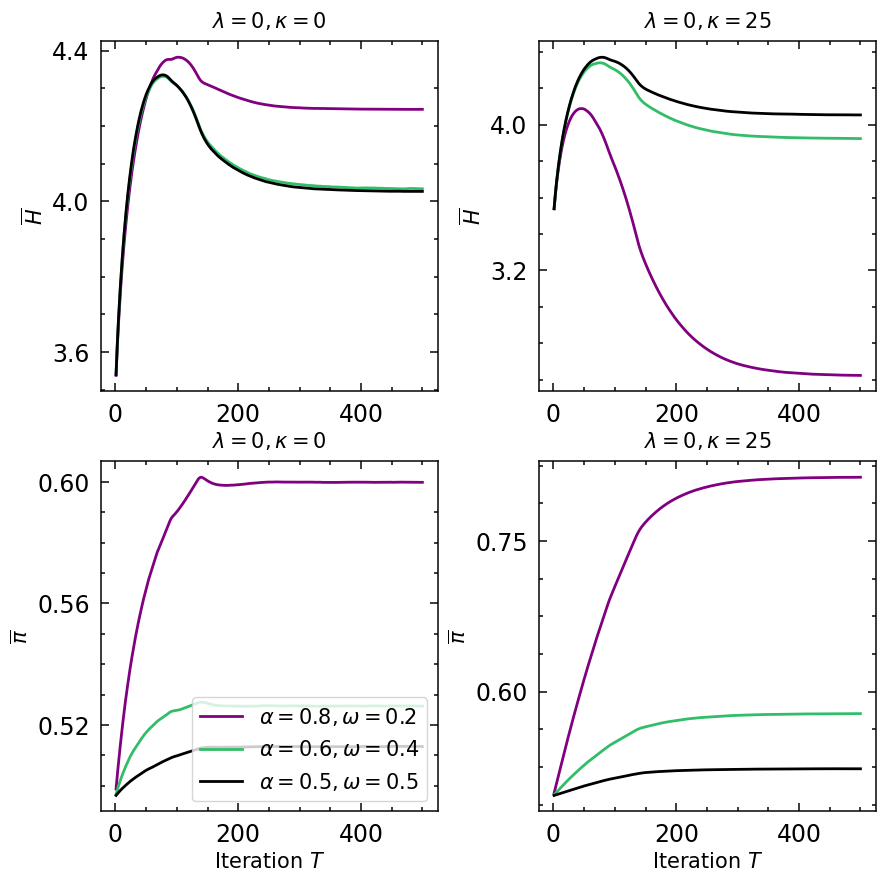

In [39]:
# parameters

nrows = 2
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 0$",
    r"$\lambda = 0, \kappa = 25$",
    r"$\lambda = 0, \kappa = 0$",
    r"$\lambda = 0, \kappa = 25$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = ""
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))
fig.subplots_adjust(wspace = 0.3)

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

axs[0][0].set_ylabel(r"$\overline{H}$")
axs[0][1].set_ylabel(r"$\overline{H}$")
axs[1][0].set_ylabel(r"$\overline{\pi}$")
axs[1][1].set_ylabel(r"$\overline{\pi}$")

# plot
line_width = 2

alpha_omega_color =  {
    (0.8, 0.2): "purple",
    (0.6, 0.4): "#32BD68",
    (0.5, 0.5): "black",
    (0.6, 0.2): "y",
    (0.4, 0.4): "g",
    (0.5, 0.2): "k",
    (0.5, 0.4): "r"
}

X = np.arange(1, 500 + 1)

valid_combinations = {(0.8, 0.2), (0.6, 0.4), (0.5, 0.5)}

selected_params = [
    x for x in params if
    x["kappa"] == 0 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[0][0].plot(
        X,
        results[make_tuple(p, True)]["entropy"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )

selected_params = [
    x for x in params if
    x["kappa"] == 25 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[0][1].plot(
        X,
        results[make_tuple(p, True)]["entropy"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )

selected_params = [
    x for x in params if
    x["kappa"] == 0 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[1][0].plot(
        X,
        results[make_tuple(p, True)]["polarity"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )

selected_params = [
    x for x in params if
    x["kappa"] == 25 and x["lambd"]  == 0
    and (x["alpha"], x["omega"]) in valid_combinations
]
for p in selected_params:
    axs[1][1].plot(
        X,
        results[make_tuple(p, True)]["polarity"],
        c = alpha_omega_color[(p["alpha"], p["omega"])],
        linewidth = line_width,
        label = r"$\alpha = {}, \omega = {}$".format(p["alpha"], p["omega"])
    )


axs[1][0].legend(loc = 'lower right', fontsize = 15)

In [41]:
data['distribution']

KeyError: 'distribution'